In [1]:
import json

reports = []
with open('data/ufodata.json') as f:
    for i, k in enumerate(f):
#         if (i % 100 == 0):
#             print(i)
        try:
            reports.append(json.loads(k))
        except:
            continue

In [2]:
reports[0]

{'_id': {'$oid': '591382287c40e83fd74240bd'},
 'url': 'http://www.nuforc.org/webreports/133/S133978.html',
 'html': '<html xmlns:v="urn:schemas-microsoft-com:vml"\r\nxmlns:o="urn:schemas-microsoft-com:office:office"\r\nxmlns:w="urn:schemas-microsoft-com:office:word"\r\nxmlns:m="http://schemas.microsoft.com/office/2004/12/omml"\r\nxmlns="http://www.w3.org/TR/REC-html40">\r\n\r\n<head>\r\n<meta http-equiv=Content-Type content="text/html; charset=windows-1252">\r\n<meta name=ProgId content=Word.Document>\r\n<meta name=Generator content="Microsoft Word 15">\r\n<meta name=Originator content="Microsoft Word 15">\r\n<link rel=File-List href="STemplate_files/filelist.xml">\r\n<!--[if gte mso 9]><xml>\r\n <o:DocumentProperties>\r\n  <o:Author>Christian Stepien</o:Author>\r\n  <o:LastAuthor>Christian Stepien</o:LastAuthor>\r\n  <o:Revision>3</o:Revision>\r\n  <o:TotalTime>1</o:TotalTime>\r\n  <o:Created>2014-02-14T21:30:00Z</o:Created>\r\n  <o:LastSaved>2014-02-14T21:35:00Z</o:LastSaved>\r\n  <o

In [3]:
type(reports)

list

In [4]:
# finds each key in json file for that record
print(reports[0].keys(), '\n')

# prints each key and value (using f strings)
for k, v in reports[0].items():
    print(f'{k}: {v} \n')

dict_keys(['_id', 'url', 'html', 'time']) 

_id: {'$oid': '591382287c40e83fd74240bd'} 

url: http://www.nuforc.org/webreports/133/S133978.html 

html: <html xmlns:v="urn:schemas-microsoft-com:vml"
xmlns:o="urn:schemas-microsoft-com:office:office"
xmlns:w="urn:schemas-microsoft-com:office:word"
xmlns:m="http://schemas.microsoft.com/office/2004/12/omml"
xmlns="http://www.w3.org/TR/REC-html40">

<head>
<meta http-equiv=Content-Type content="text/html; charset=windows-1252">
<meta name=ProgId content=Word.Document>
<meta name=Generator content="Microsoft Word 15">
<meta name=Originator content="Microsoft Word 15">
<link rel=File-List href="STemplate_files/filelist.xml">
<!--[if gte mso 9]><xml>
 <o:DocumentProperties>
  <o:Author>Christian Stepien</o:Author>
  <o:LastAuthor>Christian Stepien</o:LastAuthor>
  <o:Revision>3</o:Revision>
  <o:TotalTime>1</o:TotalTime>
  <o:Created>2014-02-14T21:30:00Z</o:Created>
  <o:LastSaved>2014-02-14T21:35:00Z</o:LastSaved>
  <o:Pages>1</o:Pages>
  <o:Wo

In [5]:
# div = soup.find("div", {"class": "scoreTable"})
# table = div.find("table")

# # This returns an iterator over the rows in the table.
# rows = table.find_all("tr")

# all_rows = []

# # Let's store each row as a dictionary 
# empty_row = {
#     "rank": None, "player": None, "time": None, "comment": None
# }

# # The first row contains header information, so we are skipping it.
# for row in rows[1:]:
#     new_row = copy.copy(empty_row)
#     # A list of all the entries in the row.
#     columns = row.find_all("td")
#     new_row['rank'] = int(columns[0].text.strip())
#     new_row['player'] = columns[1].text.strip()
#     new_row['time'] = columns[2].text.strip()
#     new_row['comment'] = columns[4].text.strip()
#     all_rows.append(new_row)

In [6]:
import json # to work with json file format
from bs4 import BeautifulSoup # to parse html
import re

In [7]:
len(reports)

136494

In [8]:
soups = []
for i in range(15000):
    soup = BeautifulSoup(reports[i]['html'], 'html.parser')
    table = soup.find_all('font')
    
    document = []
    for i in range(len(table)):
        text = ''.join(str(table[i]))
        document.append(text)

    # remember to import re
    cleaned = []
    for line in document:
        cleaned.append(re.sub('<.*?>', ' ', line))

    soups.append(cleaned)

In [9]:
for entry in soups[:2]:
    print(entry[3])

 Light seen over mountain's east of Camp McGregor.  It hovered in one spot.  It looked like a helicopter light at first.  But it was way to bright.  Then it went to a higher height.  Stayed there for a while.  Then disappeared.   ((NUFORC Note:  Report appears to us to be consistent with the sighting of Venus.  PD)) 
 Light in sky stationary.  Not a airplane or any known star.  Flickering in brightness.   ((NUFORC Note:  Possibly Venus.  Source of the report elects to remain anonymous; provides no contact information.  We could not find a city named "Mojave" in BC, Canada.  PD)) 


In [10]:
len(soups)

15000

In [11]:
# extracting features from second row

# def extract_feats(text, row, stop):
#     string = row
#     text_str = re.findall(f'{re.escape(text)}: (.*) {re.escape(stop)}', string)
#     return text_str

def extract_feats(text, row, stop):
    string = row
    text_str = re.findall(f'(?<={re.escape(text)}:).*(?={re.escape(stop)})', string)
    return text_str

In [12]:
text=['Occurred ', 'Location', 'Shape', 'Duration', 'Note']
stop = ['(Entered', 'Shape', 'Duration', 's ', 'PD']

col_values = []

for entry in soups:
    try:
        row = entry[2]
        observation = entry[3]
        occur = extract_feats(text[0], row, stop[0])[0]
        location = extract_feats(text[1], row, stop[1])[0]
        shape = extract_feats(text[2], row, stop[2])[0]
        duration = extract_feats(text[3], row, stop[3])[0]
        if 'Note' not in observation:
            note = []
        else:
            note = extract_feats(text[4], observation, stop[-1])[0]
        col_values.append([occur, location, shape, duration, observation, note])
    except:
        continue

In [24]:
import pandas as pd

data = pd.DataFrame(col_values)

In [25]:
print('Shape of UFO dataframe: ', data.shape)
data.head(20)

Shape of UFO dataframe:  (11931, 6)


,0,1,2,3,4,5
0,5/6/2017 05:00,"Camp McGregor, NM",Light,10 minute,Light seen over mountain's east of Camp McGre...,Report appears to us to be consistent with t...
1,5/5/2017 11:30,"Austin, TX",Disk,3 second,"Flying saucer descends, possibly lands in Nor...",We would like to communicate with this witne...
2,5/5/2017 03:00,"El Mirage, AZ",Circle,30 second,"While letting my dog out, a very bright white...",[]
3,5/4/2017 21:27,"Phoenix, AZ",Circle,15 second,Orange round sphere. Orange glowing sphere f...,"We have amended the time above, to reflect a..."
4,5/4/2017 18:30,"Phoenix, AZ",Teardrop,5 minute,Flying corkscrews Looking to th east at abou...,Source of the report elects to remain anonym...
5,5/4/2017 04:50,"Taft, CA",Changing,20 second,I'm a truck driver and I've seen the reddish/...,"Witness indicates ""Taft, Indiana"" in origina..."
6,5/4/2017 00:00,"Goose Creek, SC",Circle,3 minutes 53 second,"For a little over a month, I would go outside...",Source of the report elects to remain anonym...
7,5/4/2017,"Savannah, GA",Sphere,3 minute,Watched a 3-4 in sphere come in one end of de...,"For some reason, the source of the report do..."
8,5/3/2017 23:15,"West Union, OH",Circle,5 minute,I was walking my dog and I looked up at the s...,[]
9,5/3/2017 21:00,"Portland, OR",Circle,20 minute,Three moving bright lights. There were three...,[]


In [26]:
data.columns = ['occurred', 'location', 'shape', 'duration', 'report', 'note']

In [27]:
# ufo.to_csv('data/ufodata.csv')

In [28]:
data.head()

,occurred,location,shape,duration,report,note
0,5/6/2017 05:00,"Camp McGregor, NM",Light,10 minute,Light seen over mountain's east of Camp McGre...,Report appears to us to be consistent with t...
1,5/5/2017 11:30,"Austin, TX",Disk,3 second,"Flying saucer descends, possibly lands in Nor...",We would like to communicate with this witne...
2,5/5/2017 03:00,"El Mirage, AZ",Circle,30 second,"While letting my dog out, a very bright white...",[]
3,5/4/2017 21:27,"Phoenix, AZ",Circle,15 second,Orange round sphere. Orange glowing sphere f...,"We have amended the time above, to reflect a..."
4,5/4/2017 18:30,"Phoenix, AZ",Teardrop,5 minute,Flying corkscrews Looking to th east at abou...,Source of the report elects to remain anonym...


In [29]:
data['city'] = data['location'].apply(lambda x: " ".join(x.split(', ')[:1]))
data['state'] = data['location'].apply(lambda x: " ".join(x.split(', ')[1:]))
data.drop('location', axis=1, inplace=True)

In [31]:
data.head(10)

,occurred,shape,duration,report,note,city,state
0,5/6/2017 05:00,Light,10 minute,Light seen over mountain's east of Camp McGre...,Report appears to us to be consistent with t...,Camp McGregor,NM
1,5/5/2017 11:30,Disk,3 second,"Flying saucer descends, possibly lands in Nor...",We would like to communicate with this witne...,Austin,TX
2,5/5/2017 03:00,Circle,30 second,"While letting my dog out, a very bright white...",[],El Mirage,AZ
3,5/4/2017 21:27,Circle,15 second,Orange round sphere. Orange glowing sphere f...,"We have amended the time above, to reflect a...",Phoenix,AZ
4,5/4/2017 18:30,Teardrop,5 minute,Flying corkscrews Looking to th east at abou...,Source of the report elects to remain anonym...,Phoenix,AZ
5,5/4/2017 04:50,Changing,20 second,I'm a truck driver and I've seen the reddish/...,"Witness indicates ""Taft, Indiana"" in origina...",Taft,CA
6,5/4/2017 00:00,Circle,3 minutes 53 second,"For a little over a month, I would go outside...",Source of the report elects to remain anonym...,Goose Creek,SC
7,5/4/2017,Sphere,3 minute,Watched a 3-4 in sphere come in one end of de...,"For some reason, the source of the report do...",Savannah,GA
8,5/3/2017 23:15,Circle,5 minute,I was walking my dog and I looked up at the s...,[],West Union,OH
9,5/3/2017 21:00,Circle,20 minute,Three moving bright lights. There were three...,[],Portland,OR


In [38]:
times = data['occurred']
for n,time in enumerate(times):
    try:
        pd.to_datetime(time)
    except:
        print(n)
data = data.drop(index=[84, 3735,4708,5980,6806, 7655, 7801, 8161, 8267, 10236])

84
3734
4707
5979
6805
7654
7800
8160
8266
10235


In [39]:
data['dt'] = pd.to_datetime(data['occurred'])

In [40]:
data['shape'].value_counts()

 Light         2594
 Circle        1521
 Triangle      1081
 Fireball      1008
 Sphere         808
 Unknown        780
 Other          774
 Disk           493
 Oval           453
 Formation      433
 Changing       283
 Flash          260
 Rectangle      245
 Cigar          224
                189
 Diamond        175
 Cylinder       167
 Chevron        155
 Teardrop       112
 Egg             69
 Cone            56
 Cross           40
Name: shape, dtype: int64

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')

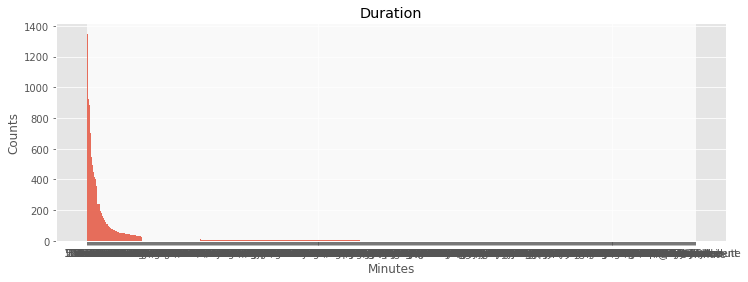

In [22]:
shape_counts = data['shape'].value_counts()
fig, ax = plt.subplots(figsize=(12,4))

duration_counts = data['duration'].value_counts()
ax.bar(duration_counts.index, height=duration_counts.values, alpha=0.8)
ax.set_title("Duration")
ax.set_ylabel("Counts")
ax.set_xlabel("Minutes")

plt.savefig('images/shape_duration.png', bbox_inches='tight')

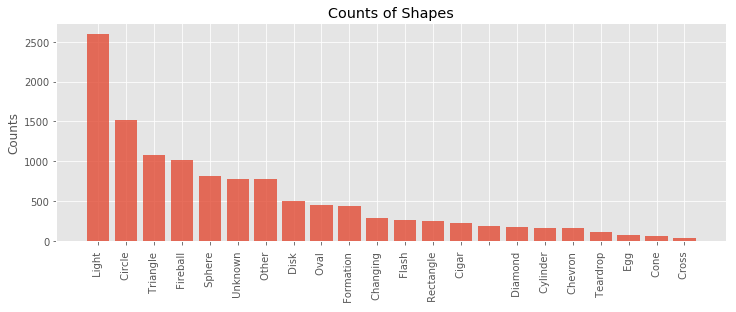

<Figure size 432x288 with 0 Axes>

In [23]:
fig, ax = plt.subplots(figsize=(12,4))

ax.bar(shape_counts.index, height=shape_counts.values, alpha=0.8)
ax.set_title("Counts of Shapes")
ax.set_ylabel("Counts")
plt.xticks(rotation=90)
plt.show()

plt.savefig('images/shape_count.png', bbox_inches='tight')